In [1]:
'''
importing all the required libraries for the project
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
'''
use sklearn’s built-in function to fetched the MNIST dataset
Since the targets are of string type, we convert them to integers.
'''
data = datasets.fetch_openml('mnist_784',version=1,return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

In [5]:
data_dp = pd.DataFrame(targets)

In [6]:
data_dp

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [7]:
'''
pixel_values is a 2-dimensional array of shape 70000x784. There are 70000 different images, each of size 28x28 pixels. Flattening 28x28 gives 784 data points.
'''

print (type(pixel_values))
pixel_values = np.array(pixel_values)
print (type(pixel_values))
single_image = pixel_values[4, :].reshape(28, 28)
print (np.shape(single_image))
print (np.shape(pixel_values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(28, 28)
(70000, 784)


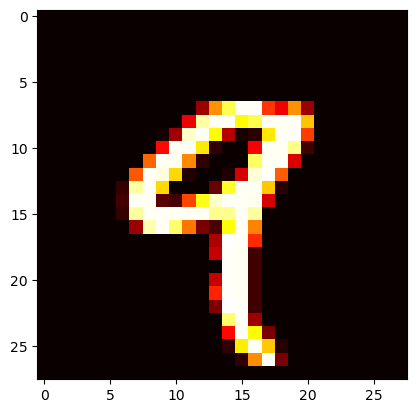

In [8]:
'''
We can visualize the samples in this dataset by reshaping them to their original shape and then plotting them using matplotlib.
'''
plt.imshow(single_image, cmap='hot')

In [9]:
'''
Create a t-distributed Stochastic Neighbour Embedding (t-SNE) object and fit it to the data. The fit_transform method will return the new transformed data.
'''
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:5000,:])

In [10]:
'''
The transformed_data is a 2-dimensional array of shape 5000x2. 
We will now convert this to a pandas dataframe and name the columns as x and y.
'''
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:5000])),columns=["x","y","targets"])
tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)

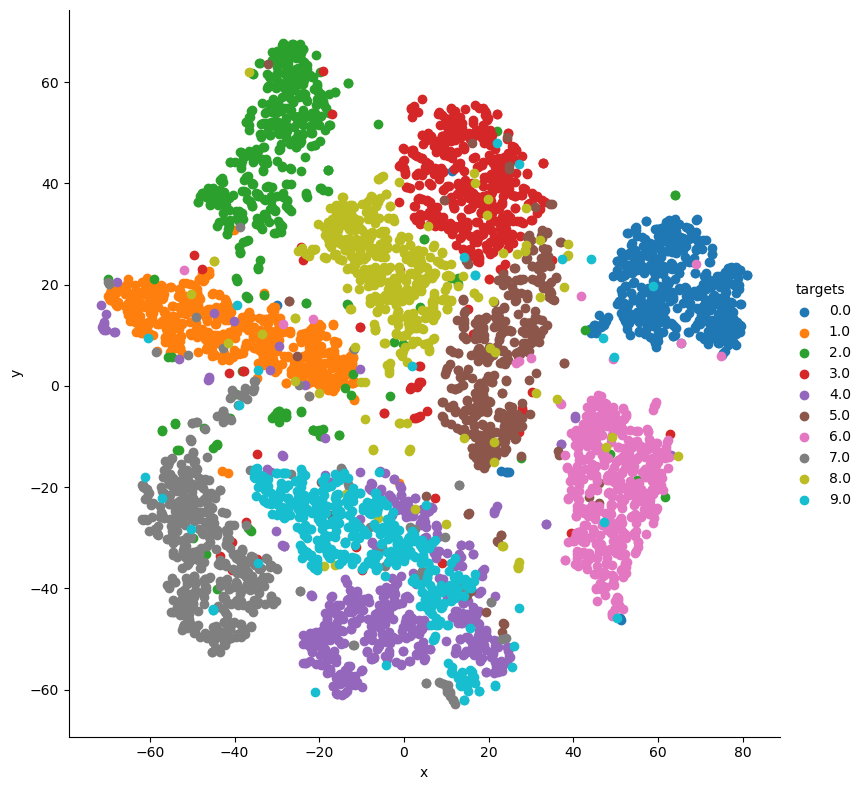

In [11]:
'''
We will now plot the t-SNE transformed data. 
The hue parameter is used to color the data points based on a particular column.
'''
grid = sns.FacetGrid(tsne_df, hue="targets", height=8)
grid.map(plt.scatter, "x", "y").add_legend()